In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Snippet to manually access the data from GDrive and upload it in the Colab
# file_id = "1_h2_aYjQ1ZldUxGConuXFw_TvIu-1N1g" #@param {type:"string"}
# !pip install -U -q PyDrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # PyDrive reference:
# # https://googledrive.github.io/PyDrive/docs/build/html/index.html


# from google.colab import auth
# auth.authenticate_user()

# from googleapiclient.discovery import build
# drive_service = build('drive', 'v3')

# # Replace the assignment below with your file ID
# # to download a different file.
# #
# # A file ID looks like: 1gLBqEWEBQDYbKCDigHnUXNTkzl-OslSO

# import io
# from googleapiclient.http import MediaIoBaseDownload

# request = drive_service.files().get_media(fileId=file_id)
# downloaded = io.BytesIO()
# downloader = MediaIoBaseDownload(downloaded, request)
# done = False
# while done is False:
#   # _ is a placeholder for a progress object that we ignore.
#   # (Our file is small, so we skip reporting progress.)
#   _, done = downloader.next_chunk()

# fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
# print(fileId['title'])
# fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

# !unzip {fileId['title']}

In [3]:
# Load your dataset
df = pd.read_csv('C:\\Users\\jugue\\OneDrive\\Desktop\\Lamina\\Week 2\\netflix.csv')
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df=df.set_index('date')
df.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,year
date,,,,,,,,,,,,,,,,,,,,
2014-01-02,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,50.112828,50.235157,46.385428,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429,2014
2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,50.228771,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142,2014
2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,50.312571,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000,2014
2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,50.336228,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856,2014
2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,50.373257,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002,2014


**Preprocessing of Dataset**

In [4]:
# Show and decsribe the whole dataset
df.describe

<bound method NDFrame.describe of                   open        high         low       close    volume  \
date                                                                   
2014-01-02   52.401428   52.511429   51.542858   51.831429  12325600   
2014-01-03   52.000000   52.495712   51.842857   51.871429  10817100   
2014-01-06   51.889999   52.044285   50.475716   51.367142  15501500   
2014-01-07   49.684284   49.698570   48.152859   48.500000  36167600   
2014-01-08   48.104286   49.425713   48.074287   48.712856  20001100   
...                ...         ...         ...         ...       ...   
2023-12-22  494.000000  496.019989  485.450012  486.760010   2701100   
2023-12-26  489.390015  491.480011  486.380005  491.190002   2034500   
2023-12-27  491.239990  494.019989  489.250000  491.790009   2561300   
2023-12-28  492.000000  492.890015  489.070007  490.510010   1710500   
2023-12-29  490.369995  492.230011  481.940002  486.880005   2739500   

                rsi_7     rsi

In [5]:
# Descriptive statistics of close and volume
print(df[['close', 'volume', 'rsi_14', 'ema_100']].describe())

             close        volume       rsi_14      ema_100
count  2516.000000  2.516000e+03  2516.000000  2516.000000
mean    274.487023  1.049230e+07    53.424079   266.813442
std     165.902954  9.173072e+06    13.088270   161.050027
min      44.887142  1.144000e+06     9.152344    46.650698
25%     110.064998  5.017050e+06    43.731175   102.490532
50%     288.229995  7.795950e+06    53.668026   291.379066
75%     384.560005  1.299060e+07    63.378696   369.343945
max     691.690002  1.333875e+08    91.547868   610.750059


In [6]:
# Shows the maximum rows and columns
df.shape

(2516, 20)

In [7]:
# Check for the null in the variables
df.isnull().sum().any()

False

In [8]:
# Check for the duplicates in the variables
df.duplicated().values.any()

False

## **Univariate Analysis of Close Price, Volume, RSI over 14 days, and EMA over 100 days**

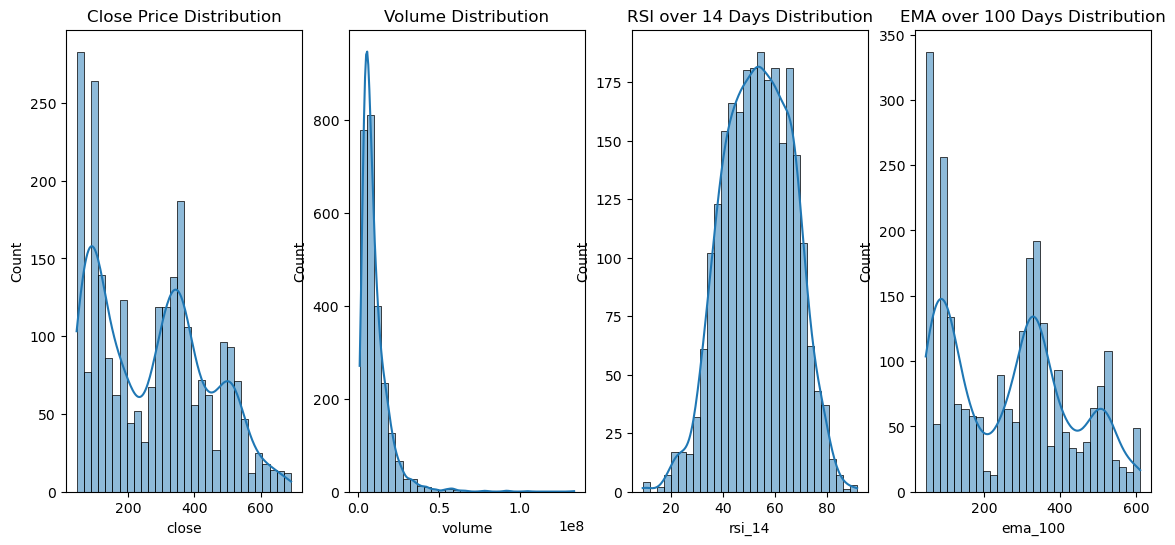

In [9]:
# Plotting distribution of 'close' price, 'volume', 'rsi_14', and 'ema_100'
plt.figure(figsize=(14, 6))

# Create the first subplot for 'close' price distribution
plt.subplot(1, 4, 1)  # 1 row, 4 columns, first subplot
sns.histplot(df['close'], kde=True, bins=30)  # Plot histogram with kernel density estimate (KDE)
plt.title('Close Price Distribution')

# Create the second subplot for 'volume' distribution
plt.subplot(1, 4, 2)  # 1 row, 4 columns, second subplot
sns.histplot(df['volume'], kde=True, bins=30)  # Plot histogram with kernel density estimate (KDE)
plt.title('Volume Distribution')

# Create the third subplot for 'rsi_14' distribution
plt.subplot(1, 4, 3)  # 1 row, 4 columns, third subplot
sns.histplot(df['rsi_14'], kde=True, bins=30)  # Plot histogram with kernel density estimate (KDE)
plt.title('RSI over 14 Days Distribution')

# Create the fourth subplot for 'ema_100' distribution
plt.subplot(1, 4, 4)  # 1 row, 4 columns, fourth subplot
sns.histplot(df['ema_100'], kde=True, bins=30)  # Plot histogram with kernel density estimate (KDE)
plt.title('EMA over 100 Days Distribution')

# Display the plots
plt.show()

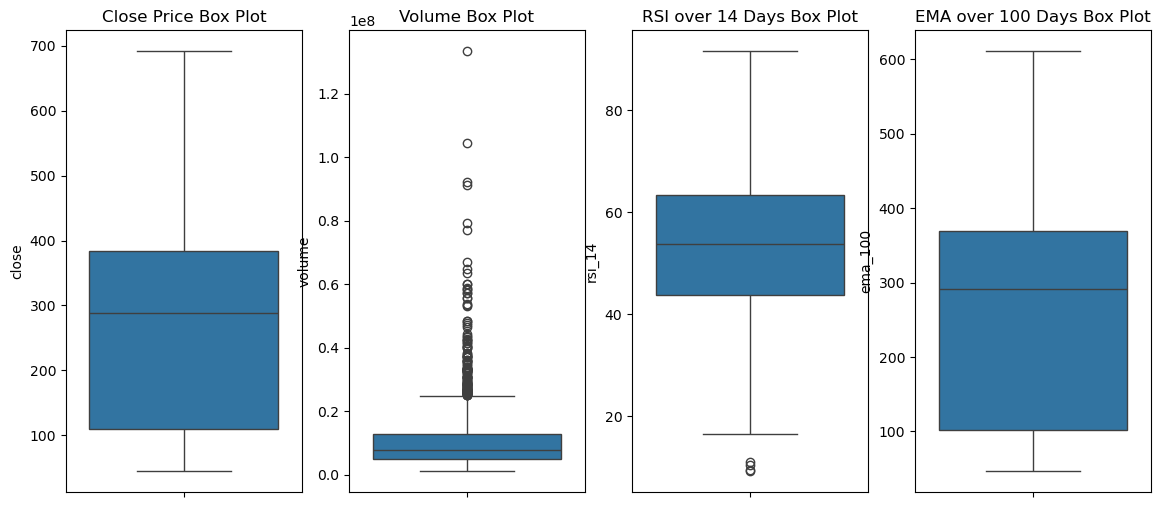

In [10]:
# Box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1) # 1 row, 4 columns, 1st plot
sns.boxplot(df['close']) # boxplot of close
plt.title('Close Price Box Plot')

plt.subplot(1, 4, 2) # 1 row, 4 columns, 2nd plot
sns.boxplot(df['volume']) # boxplot of volume
plt.title('Volume Box Plot')

plt.subplot(1, 4, 3) # 1 row, 4 columns, 3rd plot
sns.boxplot(df['rsi_14']) # boxplot of rsi_14
plt.title('RSI over 14 Days Box Plot')

plt.subplot(1, 4, 4) # 1 row, 4 columns, 4th plot
sns.boxplot(df['ema_100']) # boxplot of ema_100
plt.title('EMA over 100 Days Box Plot')

plt.show()

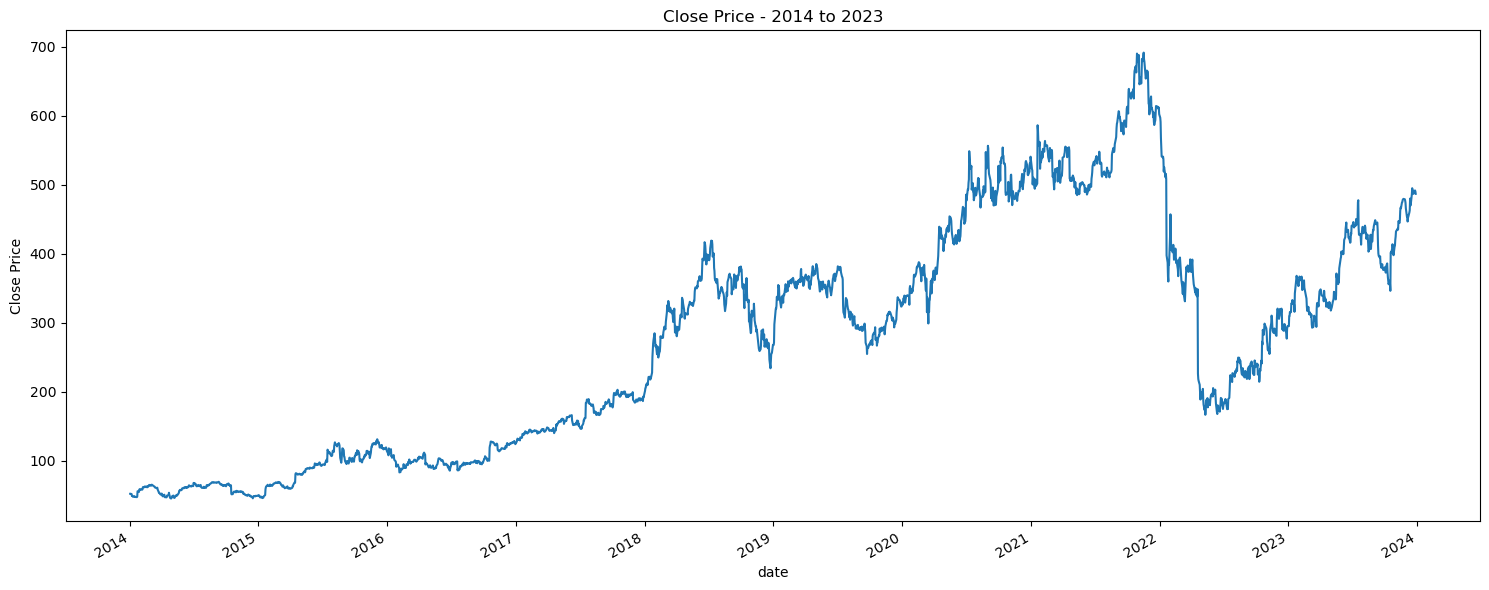

In [11]:
# Plot Close Price Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f"Close Price - 2014 to 2023")
df['close'].plot()
plt.tight_layout()

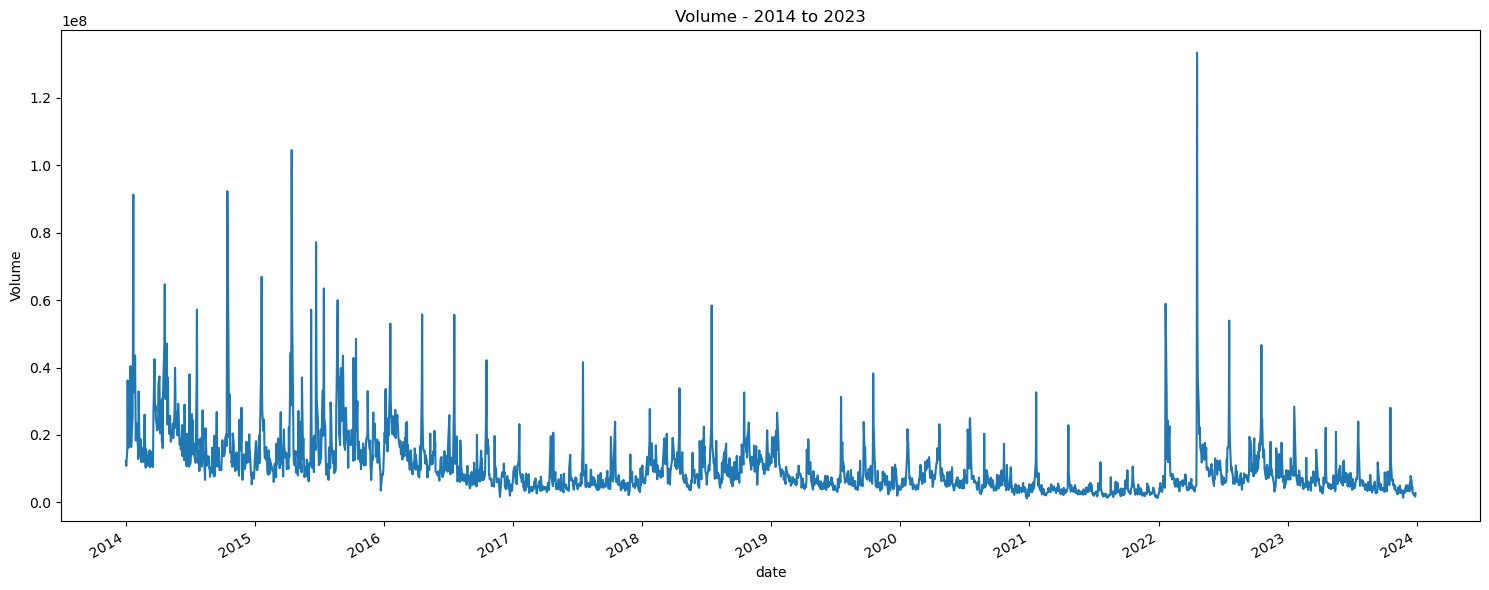

In [12]:
# Plot Volume Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title(f"Volume - 2014 to 2023")
df['volume'].plot()
plt.tight_layout()

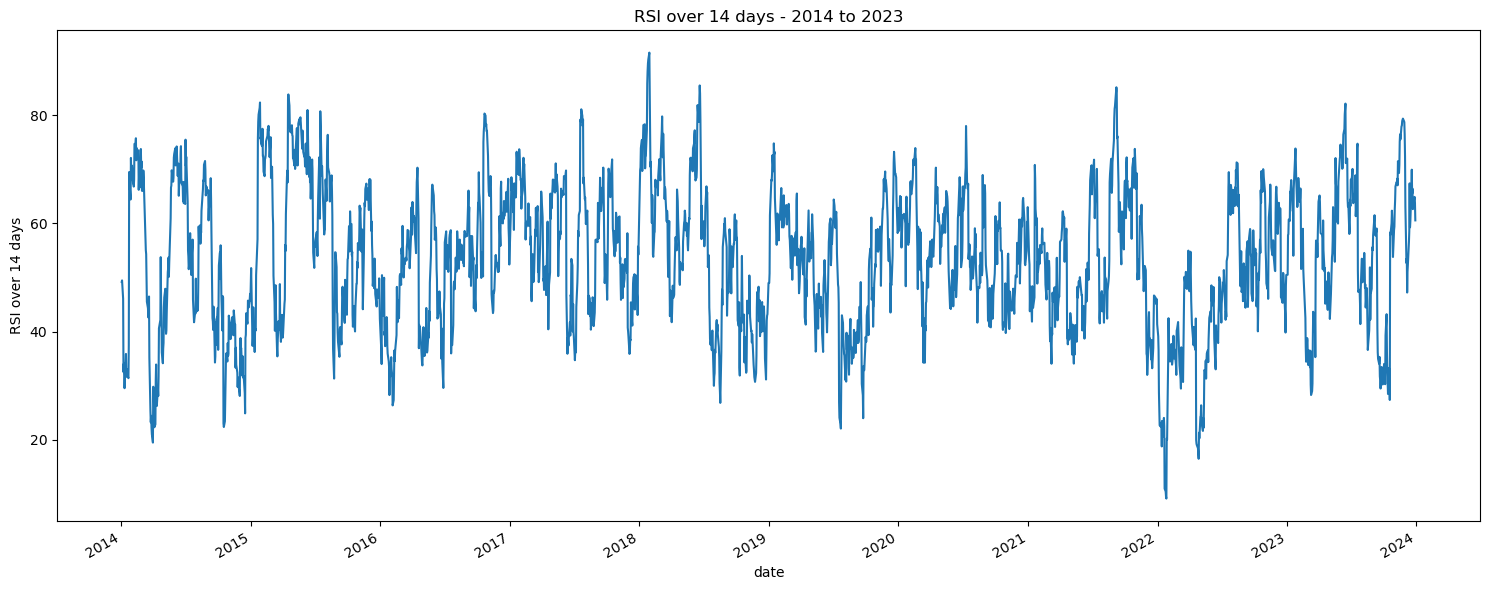

In [13]:
# Plot rsi_14 Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('RSI over 14 days')
plt.xlabel('Date')
plt.title(f"RSI over 14 days - 2014 to 2023")
df['rsi_14'].plot()
plt.tight_layout()

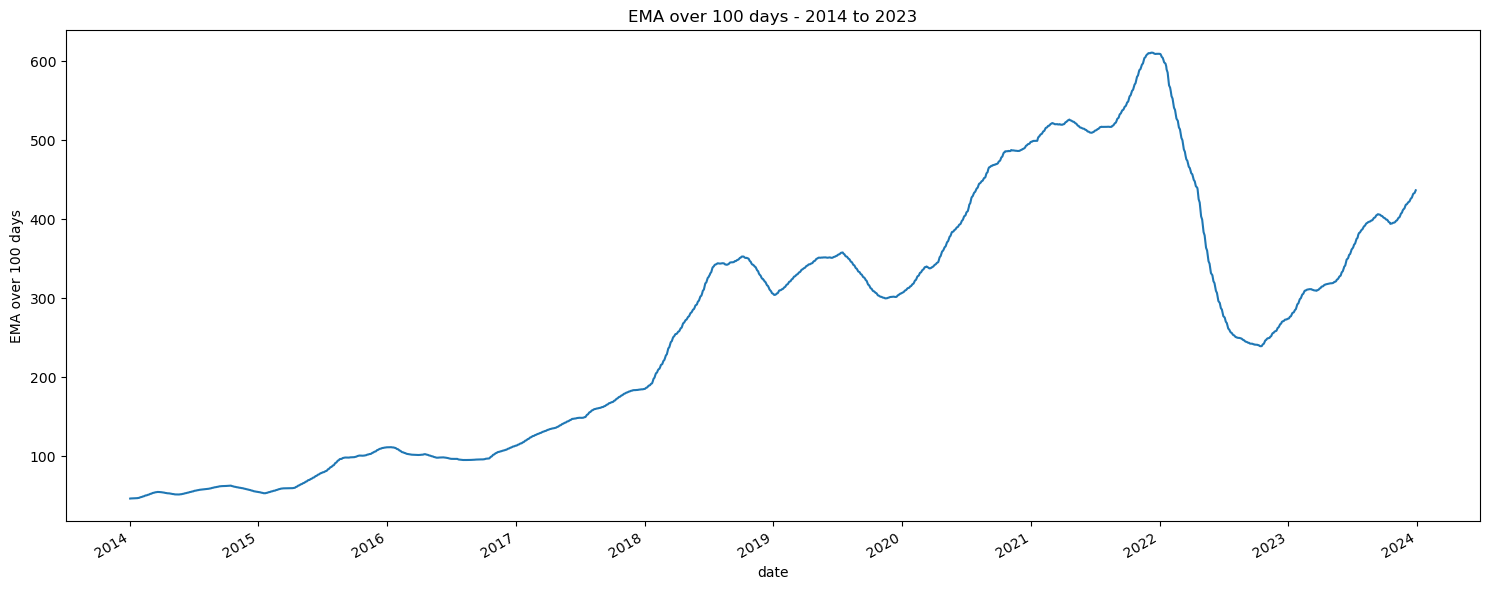

In [14]:
# Plot ema_100 Over Time
plt.figure(figsize=(15, 6))
plt.ylabel('EMA over 100 days')
plt.xlabel('Date')
plt.title(f"EMA over 100 days - 2014 to 2023")
df['ema_100'].plot()
plt.tight_layout()

## **Bivariate Analysis of Close and Volume**

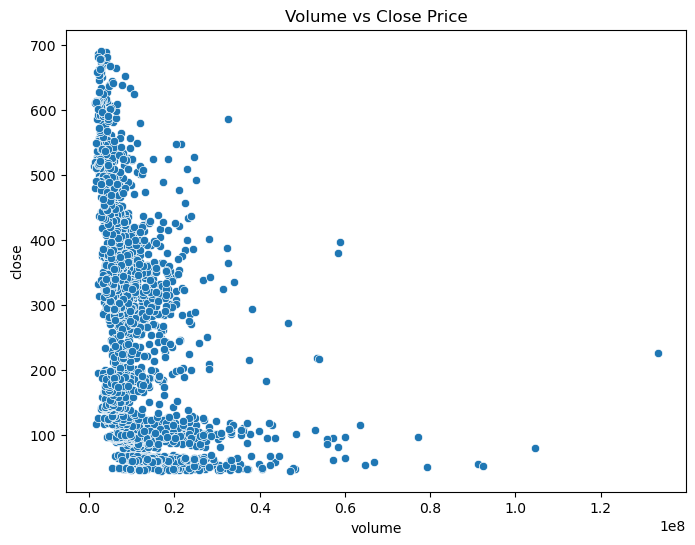

In [15]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volume', y='close', data=df)
plt.title('Volume vs Close Price')
plt.show()

In [16]:
# Correlation
correlation = df['close'].corr(df['volume'])
print(f'Correlation between close and volume: {correlation}')

Correlation between close and volume: -0.4451047560218217


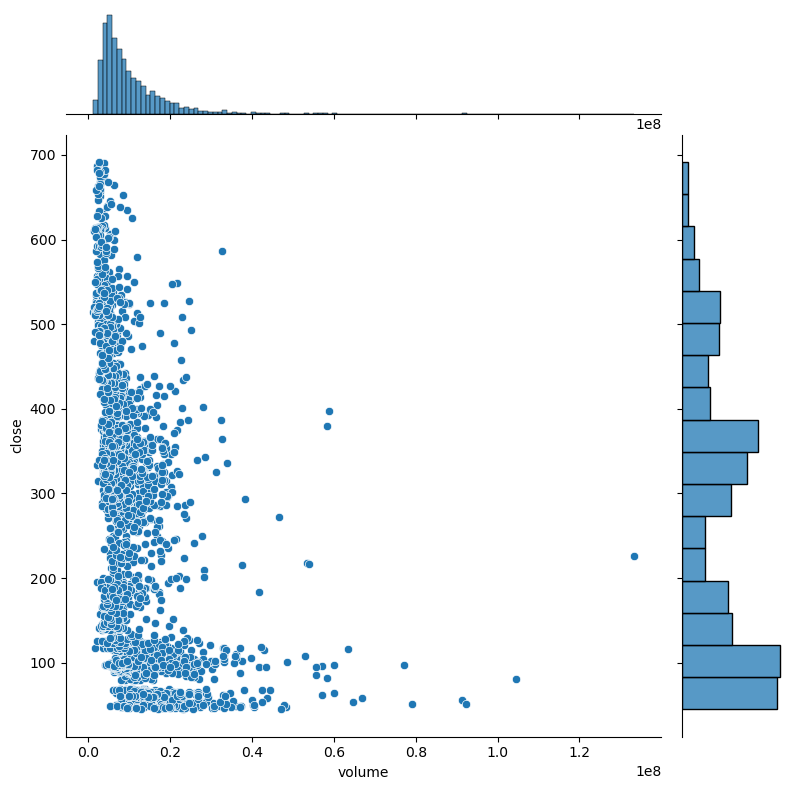

In [17]:
# Joint plot
sns.jointplot(x='volume', y='close', data=df, kind='scatter', height=8)
plt.show()

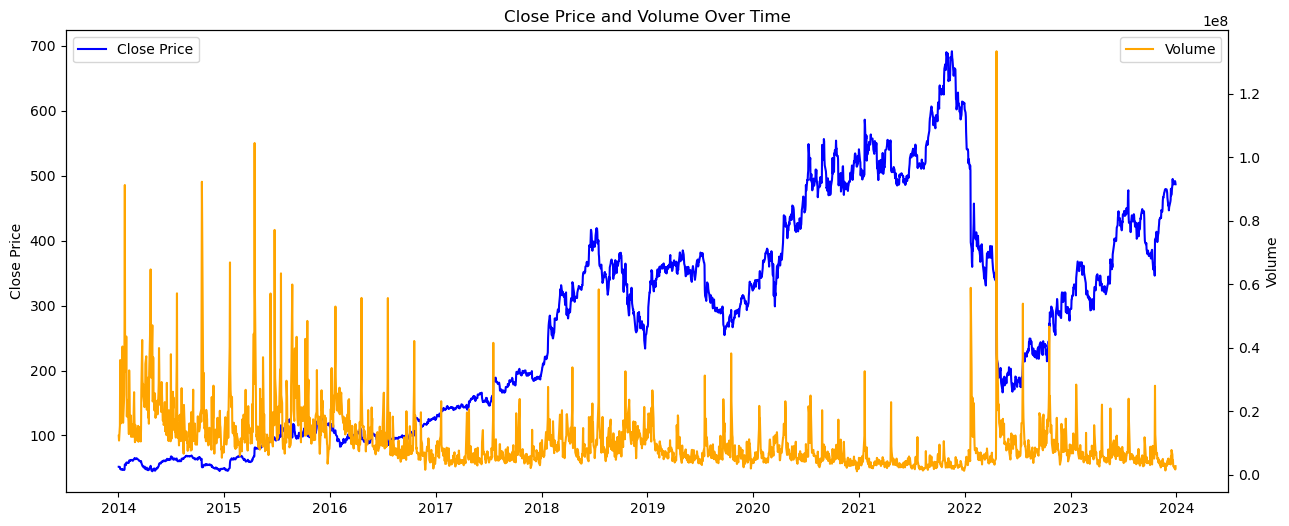

In [18]:
# Time Series Correlation
# Plotting
plt.figure(figsize=(15, 6))  # Set the figure size

# Create a secondary y-axis to plot volume
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot 'close' price on the primary y-axis
ax1.plot(df.index, df['close'], label='Close Price', color='blue')

# Plot 'volume' on the secondary y-axis
ax2.plot(df.index, df['volume'], label='Volume', color='orange')

# Set titles and labels
ax1.set_title('Close Price and Volume Over Time')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('Volume')

# Add legends to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

## **Bivariate Analysis of Close and RSI over 14 days**

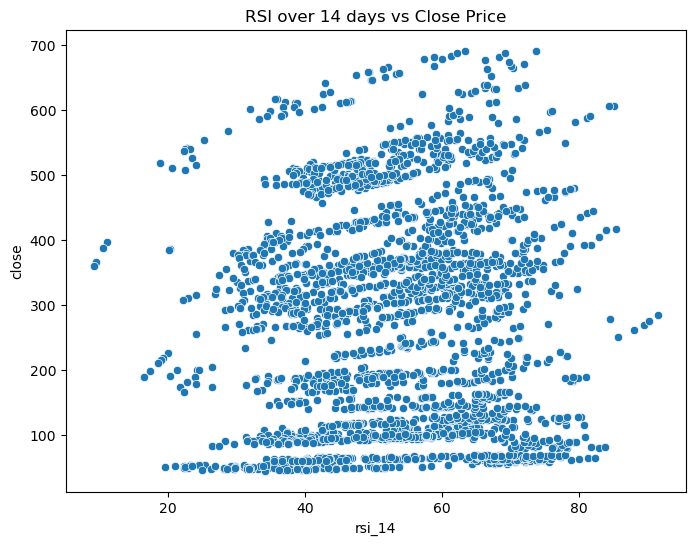

In [19]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rsi_14', y='close', data=df)
plt.title('RSI over 14 days vs Close Price')
plt.show()

In [20]:
# Correlation
correlation = df['close'].corr(df['rsi_14'])
print(f'Correlation between close and rsi_14: {correlation}')

Correlation between close and rsi_14: 0.02390265321924882


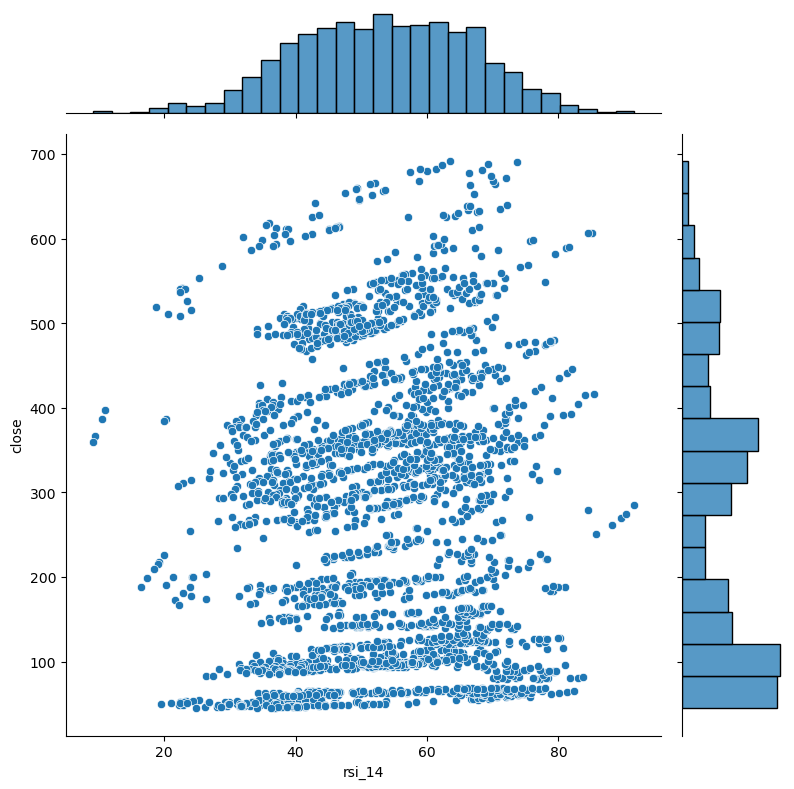

In [21]:
# Joint plot
sns.jointplot(x='rsi_14', y='close', data=df, kind='scatter', height=8)
plt.show()

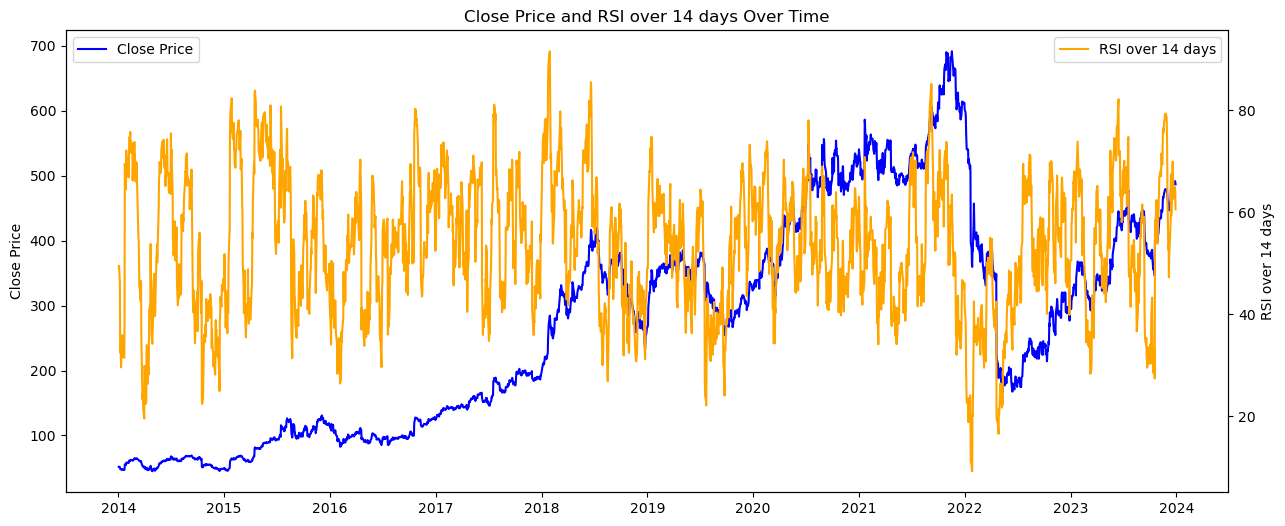

In [22]:
# Time Series Correlation
# Plotting
plt.figure(figsize=(15, 6))  # Set the figure size

# Create a secondary y-axis to plot rsi_14
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot 'close' price on the primary y-axis
ax1.plot(df.index, df['close'], label='Close Price', color='blue')

# Plot 'rsi_14' on the secondary y-axis
ax2.plot(df.index, df['rsi_14'], label='RSI over 14 days', color='orange')

# Set titles and labels
ax1.set_title('Close Price and RSI over 14 days Over Time')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('RSI over 14 days')

# Add legends to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

## **Bivariate Analysis of Close and EMA over 100 days**

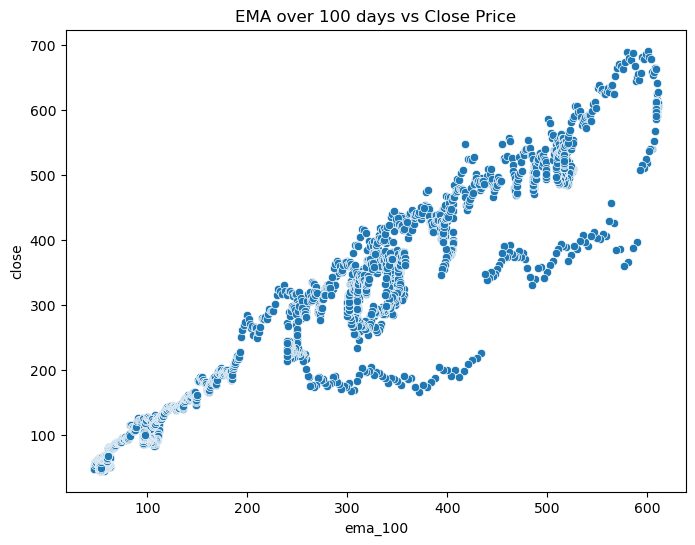

In [23]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ema_100', y='close', data=df)
plt.title('EMA over 100 days vs Close Price')
plt.show()

In [24]:
# Correlation
correlation = df['close'].corr(df['ema_100'])
print(f'Correlation between close and ema_100: {correlation}')

Correlation between close and ema_100: 0.9642554624429747


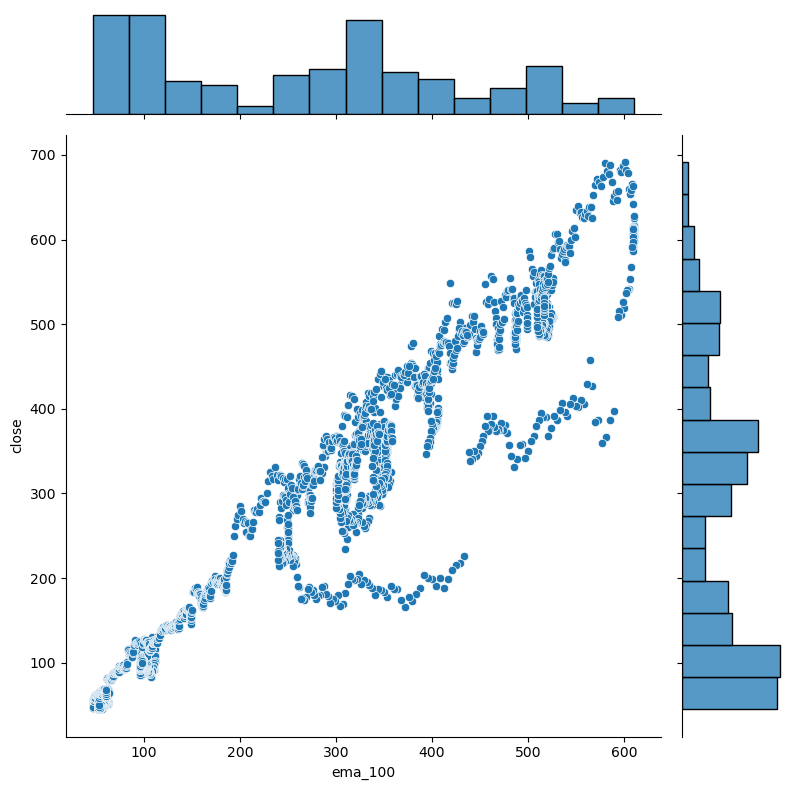

In [25]:
# Joint plot
sns.jointplot(x='ema_100', y='close', data=df, kind='scatter', height=8)
plt.show()

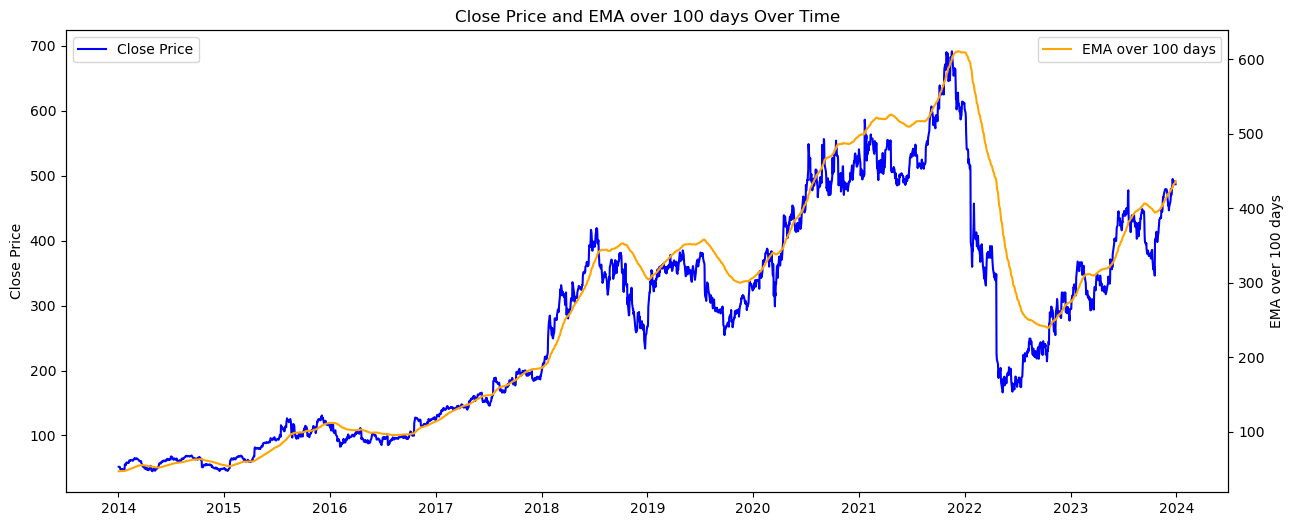

In [26]:
# Time Series Correlation
# Plotting
plt.figure(figsize=(15, 6))  # Set the figure size

# Create a secondary y-axis to plot ema_100
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot 'close' price on the primary y-axis
ax1.plot(df.index, df['close'], label='Close Price', color='blue')

# Plot 'ema_100' on the secondary y-axis
ax2.plot(df.index, df['ema_100'], label='EMA over 100 days', color='orange')

# Set titles and labels
ax1.set_title('Close Price and EMA over 100 days Over Time')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('EMA over 100 days')

# Add legends to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

## **Creating Linear Regression Model to predict Close Variable**

In [27]:
# day_shifted = df['close'].shift() # shift a day after for close column
# df['prev_close'] = day_shifted # create a previous close column and use the value from shifted above

# # removing or dropping the NaN values created from shifting the day of close
# df.dropna(inplace = True)

In [28]:
# creating the needed variables

x = df[['open', 'next_day_close', 'volume']] # these are the inputs that can be changed in order to minimze the MSA but make sure to not overfit
y = df['close'] # what we want to predict

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)

In [30]:
print(x_train.shape, y_train.shape) # to see the percentage of splitting, test and train

(2012, 3) (2012,)


In [31]:
# Linear regression implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [32]:
print(LR.coef_)
print(LR.intercept_)

[6.40413407e-01 3.59707472e-01 2.86943818e-08]
-0.4054365612698234


In [33]:
# printing the predicted value
predicted = LR.predict(x_test)
print(x_test)
print(predicted)

                  open  next_day_close    volume
date                                            
2015-10-14  111.500000      101.089996  33231500
2016-12-09  123.779999      122.830002   4700800
2015-08-13  120.989998      123.389999  15284400
2016-02-24   88.500000       94.529999  15972800
2021-08-04  513.000000      524.890015   2039400
...                ...             ...       ...
2017-02-16  142.419998      142.220001   2847500
2016-09-19   99.900002       98.250000   8616200
2015-03-23   60.889999       62.611427   7664300
2019-09-06  293.350006      294.339996   5166600
2021-11-09  653.700012      646.909973   2415600

[504 rows x 3 columns]
[108.31704254 123.18269034 121.90106126  90.73262652 516.99202078
 361.50015945  99.74040793 194.98445739 151.54178642  47.56318589
 292.00644124 411.46855932 304.88156452 561.33227039  61.45599013
 375.77846964  59.29888957 153.9187316   68.21401433 284.76499002
 304.15855867 285.34140112  47.76252596 144.69757751 119.45621337
 538.3390

In [34]:
print(y_test.shape)
print(predicted.shape)

(504,)
(504,)


In [35]:
# Calculating the accuracy of the model
print("Model Accuracy:", LR.score(x_test, y_test))

Model Accuracy: 0.9988814126174316


In [36]:
frame = pd.DataFrame({'Actual Value': y_test, "Predicted": predicted})
print(frame)

            Actual Value   Predicted
date                                
2015-10-14    110.230003  108.317043
2016-12-09    122.879997  123.182690
2015-08-13    123.730003  121.901061
2016-02-24     91.610001   90.732627
2021-08-04    517.349976  516.992021
...                  ...         ...
2017-02-16    142.009995  142.041544
2016-09-19     98.059998   99.160360
2015-03-23     60.714287   61.331056
2019-09-06    290.170013  293.484388
2021-11-09    655.989990  651.000480

[504 rows x 2 columns]


In [37]:
LR.score(x_train, y_train)

0.9990214155384624

In [38]:
LR.score(x_test, y_test)

0.9988814126174316

In [39]:
import math
from sklearn import metrics

# Mean Error indicates whether the model needs more adjustment of input, avoid overfitting, more inputs does not mean better result
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R-squared", metrics.r2_score(y_test, predicted))

Mean Absolute Error 3.5114201538976046
Mean Square Error 30.84084783182292
Root Mean Error 5.5534536850344685
R-squared 0.9988814126174316


In [40]:
# Showing the predicted results and that will be passed on plotting later
predicted = LR.predict(x)
print(predicted)

[ 52.16535653  51.68359538  50.71623282 ... 490.70484956 489.86141705
 482.23564138]


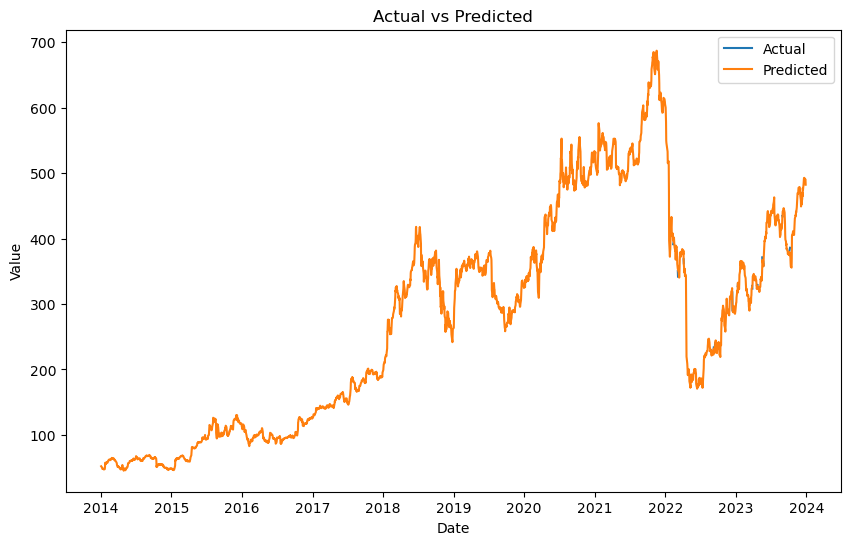

In [41]:
# Convert them to pandas Series with the same index
y_test_series = pd.Series(y_test, index=df.index[-len(y_test):]) #etong part na toh di
predicted_series = pd.Series(predicted, index=df.index[-len(predicted):])

# Plot the graph created by linear regression
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(y_test_series, label="Actual")
plt.plot(predicted_series, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

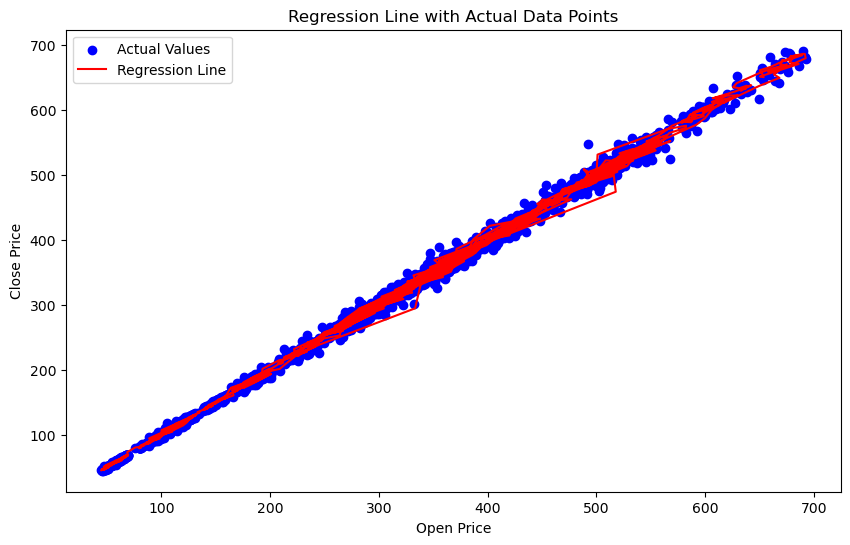

In [42]:
# Plotting the regression line against the 'open' feature
plt.figure(figsize=(10, 6))
plt.scatter(x['open'], y, color="blue", label="Actual Values")  # Scatter plot of actual values
plt.plot(x['open'], LR.predict(x), color="red", label="Regression Line")  # Regression line
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Regression Line with Actual Data Points")
plt.legend()
plt.show()

## **Creating Random Forest Regressor Model to predict Close Variable**

In [43]:
# Create the model random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train) # fit is another term for train

RandomForestRegressor()

In [44]:
# printing the predicted value
predicted = model.predict(x_test)
print(x_test)
print(predicted)

                  open  next_day_close    volume
date                                            
2015-10-14  111.500000      101.089996  33231500
2016-12-09  123.779999      122.830002   4700800
2015-08-13  120.989998      123.389999  15284400
2016-02-24   88.500000       94.529999  15972800
2021-08-04  513.000000      524.890015   2039400
...                ...             ...       ...
2017-02-16  142.419998      142.220001   2847500
2016-09-19   99.900002       98.250000   8616200
2015-03-23   60.889999       62.611427   7664300
2019-09-06  293.350006      294.339996   5166600
2021-11-09  653.700012      646.909973   2415600

[504 rows x 3 columns]
[108.88907126 124.02030028 120.50520061  89.76917212 516.11429944
 361.30430325  99.75639801 194.07279923 152.78529985  47.40685797
 290.45340143 410.93810235 307.58679747 565.31810489  61.35329925
 372.20520138  58.92641402 154.10749861  68.01567169 280.7177916
 305.73470206 285.05060097  46.94901531 144.77570032 118.80129977
 534.97110

In [45]:
# Calculating the accuracy of the model
print("Model Accuracy:", model.score(x_test, y_test))

Model Accuracy: 0.9985164438652759


In [46]:
frame = pd.DataFrame({'Actual Value': y_test, "Predicted": predicted})
print(frame)

            Actual Value   Predicted
date                                
2015-10-14    110.230003  108.889071
2016-12-09    122.879997  124.020300
2015-08-13    123.730003  120.505201
2016-02-24     91.610001   89.769172
2021-08-04    517.349976  516.114299
...                  ...         ...
2017-02-16    142.009995  142.329300
2016-09-19     98.059998   99.193641
2015-03-23     60.714287   61.406385
2019-09-06    290.170013  294.290601
2021-11-09    655.989990  645.034093

[504 rows x 2 columns]


In [47]:
model.score(x_train, y_train)

0.9998320997828779

In [48]:
model.score(x_test, y_test)

0.9985164438652759

In [49]:
from sklearn import metrics
import math
# Mean Error indicates whether the model needs more adjustment of input, avoid overfitting, more inputs does not mean better result
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error 4.138577528571432
Mean Square Error 40.90349105845873
Root Mean Error 6.395583715225587


In [50]:
# Showing the predicted results and that will be passed on plotting later
predicted = model.predict(x)
print(predicted)

[ 51.90034315  51.78951451  51.26374212 ... 490.7353061  490.4901067
 485.17060451]


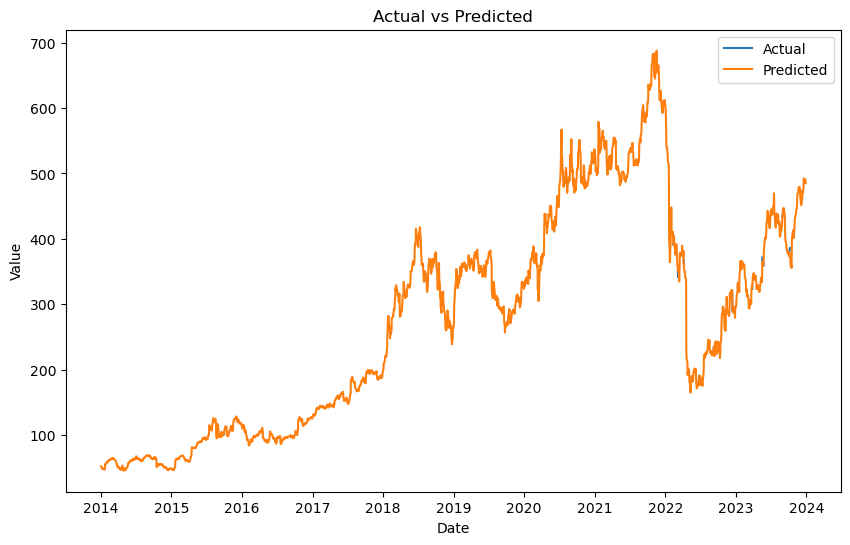

In [51]:
# Convert them to pandas Series with the same index
y_test_series = pd.Series(y_test, index=df.index[-len(y_test):]) #etong part na toh di
predicted_series = pd.Series(predicted, index=df.index[-len(predicted):])

# Plot the graph created by linear regression
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(y_test_series, label="Actual")
plt.plot(predicted_series, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

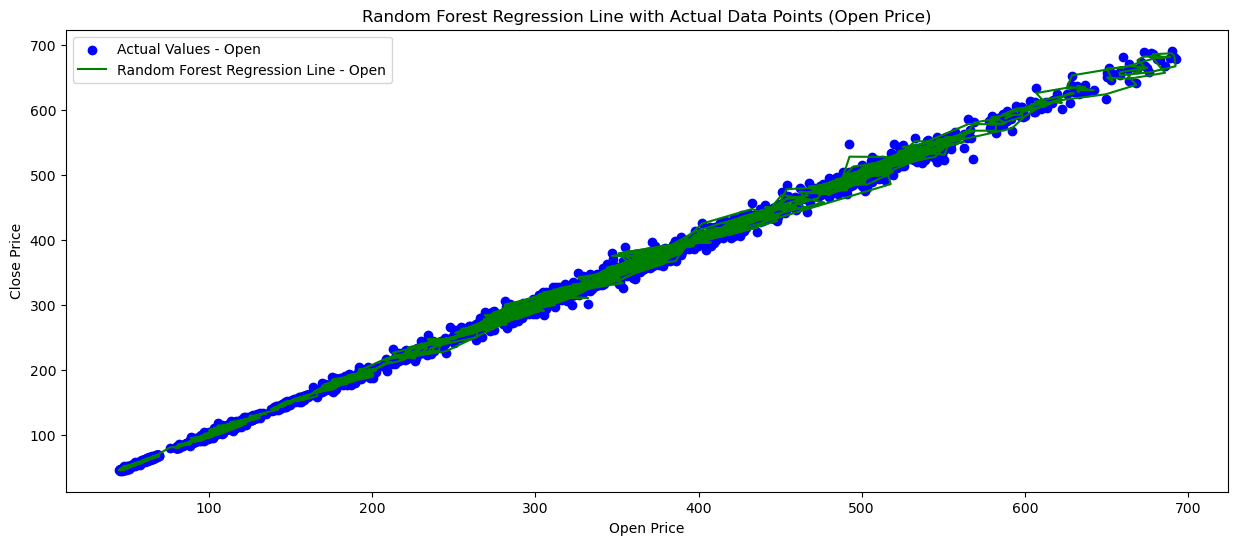

In [52]:
# Plot 'open' against 'close'
plt.figure(figsize=(15, 6))
plt.scatter(x['open'], y, color="blue", label="Actual Values - Open")
plt.plot(x['open'], model.predict(x), color="green", label="Random Forest Regression Line - Open")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Random Forest Regression Line with Actual Data Points (Open Price)")
plt.legend()
plt.show()

# # Plot 'volume' against 'close'
# plt.figure(figsize=(15, 6))
# plt.scatter(x['volume'], y, color="blue", label="Actual Values - Volume")
# plt.plot(x['volume'], model.predict(x), color="green", label="Random Forest Regression Line - Volume")
# plt.xlabel("Volume")
# plt.ylabel("Close Price")
# plt.title("Random Forest Regression Line with Actual Data Points (Volume)")
# plt.legend()
# plt.show()

# # Plot 'high' against 'close'
# plt.figure(figsize=(15, 6))
# plt.scatter(x['high'], y, color="blue", label="Actual Values - High")
# plt.plot(x['high'], model.predict(x), color="green", label="Random Forest Regression Line - High")
# plt.xlabel("High Price")
# plt.ylabel("Close Price")
# plt.title("Random Forest Regression Line with Actual Data Points (High Price)")
# plt.legend()
# plt.show()